**Project done by:** *Vatsal Bhuva*

**Title:** *Using Linear Regression to assess a Customer's Behaviour*

# **Customer Behaviour**
- This project analyses the information about around 400 customers to predict whether a given customer is likely to buy a product or not. Since we are classifying the customers into 2 (those who will buy the product, and those who won't), we are required to use a Classification Algorithm or more specifically, Logistic Regression.


In [2]:
#importing the data and creating a dataframe.

import pandas as pd
df = pd.read_csv('Customer_Behaviour.csv')
print(df) #loaded the dataset.

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
#performing EDA to remove unnecessary columns/data.

#as can be seen, the 'User ID' column is not needed. we can remove that column from the set of inputs.
#the gender, age and estimated salary can be factors affecting the decision of a customer.
try:
  df = df.drop(['User ID'], axis = 1)
  print("The column 'User ID' is removed now. \n")
except KeyError:
  print("The column 'User ID' has already been removed.\n")

#for uniformity in the datatypes of the columns, we can change Male to 1 and Female to 0.
newGend = []
for gend in df['Gender']:
  if gend == 'Male':
    newGend.append(1)
  else:
    newGend.append(0)

df = df.drop(['Gender'], axis = 1)
df.insert(loc = 0, column = 'Gender', value = newGend)
print(df)


The column 'User ID' is removed now. 

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


In [5]:
#scaling down the estimated salary 
df['EstimatedSalary'] = df['EstimatedSalary']/1000
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19             19.0          0
1         1   35             20.0          0
2         0   26             43.0          0
3         0   27             57.0          0
4         1   19             76.0          0
..      ...  ...              ...        ...
395       0   46             41.0          1
396       1   51             23.0          1
397       0   50             20.0          1
398       1   36             33.0          0
399       0   49             36.0          1

[400 rows x 4 columns]


Text(0, 0.5, 'Purchased')

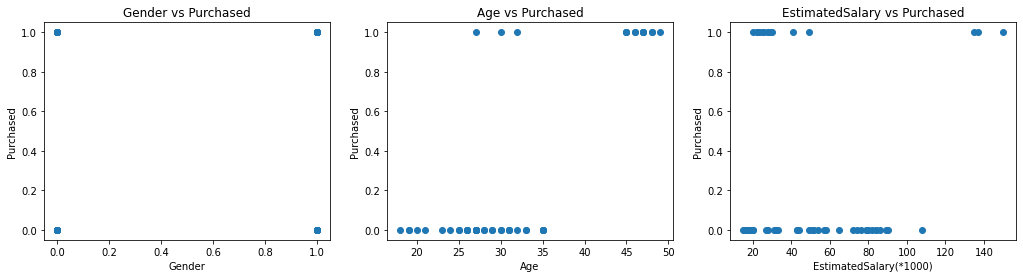

In [6]:
#let's visually check the dependence of various factors on the behaviour of a customer.
tempDf = df.iloc[0:51,:]

import matplotlib.pyplot as plt
figure, axis = plt.subplots(1,3)
x1 = tempDf['Gender']
x2 = tempDf['Age']
x3 = tempDf['EstimatedSalary']
y = tempDf['Purchased']
figure.subplots_adjust(left=0, right = 2.25)
axis[0].scatter(x1, y)
axis[0].set_title('Gender vs Purchased')
axis[0].set_xlabel('Gender')
axis[0].set_ylabel('Purchased')
axis[1].scatter(x2, y)
axis[1].set_title('Age vs Purchased')
axis[1].set_xlabel('Age')
axis[1].set_ylabel('Purchased')
axis[2].scatter(x3, y)
axis[2].set_title('EstimatedSalary vs Purchased')
axis[2].set_xlabel('EstimatedSalary(*1000)')
axis[2].set_ylabel('Purchased')

In [7]:
#as can be seen, gender does not affect the behaviour of a customer much but age and estimatedsalary do.

In [8]:
#we have 3 input factors, and 2 outputs possible
# INPUTS: Gender, Age, EstimatedSalary
# OUTPUTS: 0 (did not purchase the product), 1 (purchased the product)

x = df.iloc[:, 0:3]
y = df.iloc[:, 3]
print(x)
print(y)

#now, our dataframe has been extracted into two variables: x (inputs) and y(outputs)

     Gender  Age  EstimatedSalary
0         1   19             19.0
1         1   35             20.0
2         0   26             43.0
3         0   27             57.0
4         1   19             76.0
..      ...  ...              ...
395       0   46             41.0
396       1   51             23.0
397       0   50             20.0
398       1   36             33.0
399       0   49             36.0

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [9]:
#since our dataset has a considerable amount of data, we have to split the data into training and testing data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
#the input has been split into training (75%) and testing (25%) data. similarly for output.

(400, 3)
(300, 3)
(100, 3)


In [10]:
#now we run the logistic regression.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train) #this trains our model based on the training data.

LogisticRegression()

In [11]:
#once we have trained the model, we can predict the output of the testing data and compare the actual values.
y_pred = model.predict(x_test)
#we can create a dataframe consisting of y_pred and y_test to compare the two outputs.
y_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
y_df
#the difference in y_pred and y_test gives us information about how correct our model is

,y_test,y_pred
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


In [12]:
#now, we calculate the accuracy of our model.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test) * 100

91.0

In [13]:
#we can use the model to predict whether a given customer is likely to buy the product or not
#input features: ['Gender', 'Age', 'EstimatedSalary'] , Gender = 1 for Male, 0 for Female

model.predict([[1, 35, 140000]]) #output is 1 if likely to buy, 0 if not likely to buy.


c:\Users\vatsa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Thank You!**


---

